In [4]:
import numpy as np
from scipy.special import expit
from numpy import logaddexp
from glopt import GLMProblem,SolverSettings
from problems import build_random_logistic,build_logistic_lasso
import matplotlib.pyplot as plt
from scipy.sparse import csc_array,diags_array,csr_array,block_array

In [5]:
m = 10
n = 8

f,A,Q,C,c,b = build_random_logistic(m = m,n = n,k = 2,density=0.1, seed = 2)
E = csr_array(diags_array([1,-1],offsets=[0,1],shape=(n-1,n)))
E = csc_array(E[::2])
e = np.ones(E.shape[0])
problem = GLMProblem(f,A,Q,C,c,b,E = E ,e = e)
x,results = problem.solve(verbose = True) 


──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 8       │ Rows in A: 10      │ Equality Constraints: 4       │ Inequality Constraints: 2      
──────────────────────────────────────────────────────────────────────────────────────────────────────────
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │  time  │
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9052e+02 │  3.78e+02 │  6.07e-01 │  2.36e+05 │  2.36e+05 │  1.1e+05 │ 4.5e+02 │ 1.0e+00 │   0.01s │
│    2 │ 1.1549e+04 │  3.00e+01 │  7.35e-05 │  1.06e+05 │  1.06e+05 │  1.1e+03 │ 4.9e+06 │ 1.0e+00 │   0.01s │
│    3 │ 1.7760e+08 │  2.23e+01 │  4.58e+06 │  1.55e+05 │  4.58e+06 │  7.0e+04 │ 4.6e+06 │ 4.7e-01 │   0.02s │
│    4 │ 1.4275e

In [6]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
problem = GLMProblem(f,A,Q,C,c,b)
x,results = problem.solve()

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 500     │ Rows in A: 10,000  │ Equality Constraints: 0       │ Inequality Constraints: 100    
──────────────────────────────────────────────────────────────────────────────────────────────────────────
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │  time  │
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+05 │  1.84e+03 │  6.42e+00 │  2.85e+02 │  1.84e+03 │  4.9e+02 │ 3.6e-01 │ 3.4e-02 │   0.11s │
│    2 │ 6.9868e+05 │  1.56e+03 │  5.37e+00 │  1.49e+04 │  1.49e+04 │  3.4e+02 │ 5.4e-01 │ 1.6e-01 │   0.18s │
│    3 │ 6.8657e+05 │  9.53e+02 │  3.01e+00 │  9.16e+03 │  9.16e+03 │  3.2e+02 │ 5.2e-01 │ 4.4e-01 │   0.26s │
│    4 │ 6.5579e

In [7]:
n = 2000
lam = 250.
f,A,Q,C,c,b,x_true = build_logistic_lasso(m = 10000,n = n, seed = 2,lam = lam)
problem = GLMProblem(f,A,Q,C,c,b = b)
xt,results = problem.solve(verbose = True)

x = xt[:n]

──────────────────────────────────────────────────────────────────────────────────────────────────────────
Variables:: 4,000   │ Rows in A: 10,000  │ Equality Constraints: 0       │ Inequality Constraints: 4,000  
──────────────────────────────────────────────────────────────────────────────────────────────────────────


─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │   Δx    │  step   │  time  │
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+06 │  9.75e+02 │  0.00e+00 │  6.55e+04 │  6.55e+04 │  5.2e+04 │ 9.4e+01 │ 1.0e+00 │   1.65s │
│    2 │ 5.3693e+07 │  1.46e+01 │  2.84e-14 │  2.99e+04 │  2.99e+04 │  5.2e+02 │ 6.5e+01 │ 1.0e+00 │   3.14s │
│    3 │ 8.6349e+07 │  9.96e-03 │  2.75e-14 │  8.71e+02 │  8.71e+02 │  5.2e+00 │ 1.6e+02 │ 1.0e+00 │   4.72s │
│    4 │ 8.7938e+06 │  2.44e-01 │  9.55e-15 │  3.55e+02 │  3.55e+02 │  6.2e+01 │ 2.7e+00 │ 6.7e-01 │   6.23s │
│    5 │ 7.4401e+06 │  8.52e+00 │  4.44e-16 │  1.70e+02 │  1.70e+02 │  6.2e-01 │ 9.2e-01 │ 1.0e+00 │   7.68s │
│    6 │ 7.0404e+06 │  1.19e+00 │  4.44e-16 │  2.65e+01 │  2.65e+01 │  3.5e-02 │ 6.1e-01 │ 8.7e-01 │   9.15s │
│   

In [8]:
np.max(np.ones((0,)))

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
problem.initialize()

(array([ 0.5, -0.5,  0.5, -0.5,  0.5, -0.5,  0.5, -0.5,  0. ]),
 array([1., 1.]),
 array([0.41986912, 0.01      ]),
 array([-0.5, -0.5, -0.5, -0.5]))

In [ ]:
from scipy.sparse import triu
import qdldl

H = A.T@A

G = block_array(
            [
                [H + Q,C.T        ,E.T],
                [C               ,-1*problem.Ik  ,None],
                [E           ,None         ,0*diags_array(np.ones(E.shape[0]))]
            ],format = 'csc'
        )

# G = triu(G,format = 'csc')
# G.sort_indices()

# G.eliminate_zeros()

qdldl.Solver(G)

In [ ]:
G.indices

array([ 0, 11,  1, 11,  2,  7,  9, 12,  3, 12,  4,  9, 10, 13,  5,  9, 13,
        6, 14,  2,  7, 14,  8,  2,  4,  5,  9,  4, 10,  0,  1,  2,  3,  4,
        5,  6,  7], dtype=int32)

In [ ]:
G[0,0]

1e-07

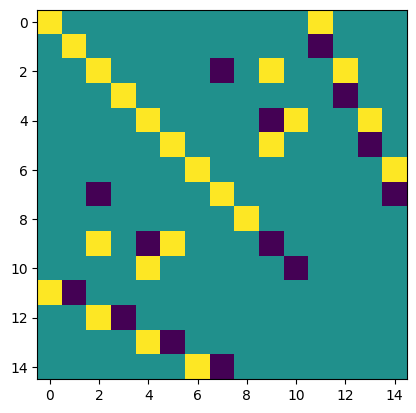

In [ ]:
plt.imshow(np.sign(G.toarray()))

In [ ]:
dir(A)

['T',
 '__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__round__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_allow_nd',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_ascontainer',
 '_asfptype',
 '_broadcast_to',
 '_bsr_container',
 '_check',
 '_container',
 '_coo_container',
 '_coo_to_compressed',
 '_csc_container',
 '

In [ ]:
# keep ONE triangle, drop duplicates, sort rows
G = triu(G, k=0, format='csc')   # strictly upper incl. diag
G.sum_duplicates()                            # merge (i,j) duplicates
G.sort_indices()                              # rows strictly increasing
# ------------------------------------------------------------
solver = qdldl.Solver(G, upper=True)          # or .update(...)


RuntimeError: Error in computing elimination tree. Matrix not properly upper-triangular, sum_Lnz = -1

In [ ]:
import qdldl

qdldl.Solver?

Docstring:      <no docstring>
Init docstring: __init__(self: qdldl.Solver, A: object, upper: bool = False) -> None
File:           ~/miniconda3/envs/spx-opt/lib/python3.12/site-packages/qdldl.cpython-312-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     

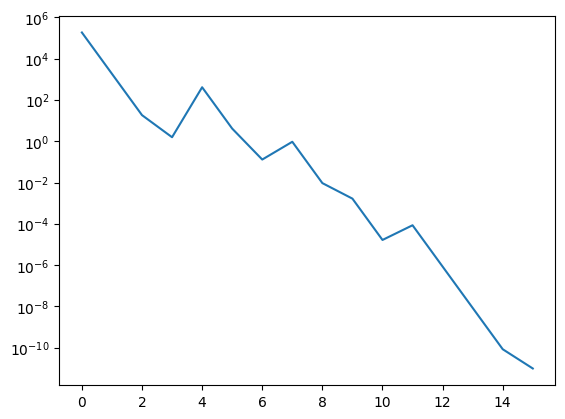

In [ ]:
plt.plot(results.history['mu'])
plt.yscale('log')

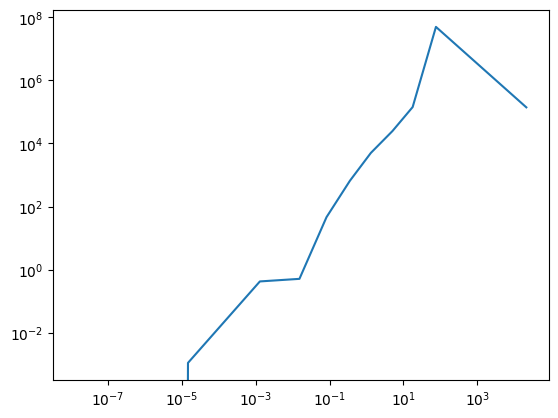

In [ ]:
plt.plot(results.history['comp_res'],results.history['primal'] - np.min(results.history['primal']))
plt.yscale('log')
plt.xscale('log')

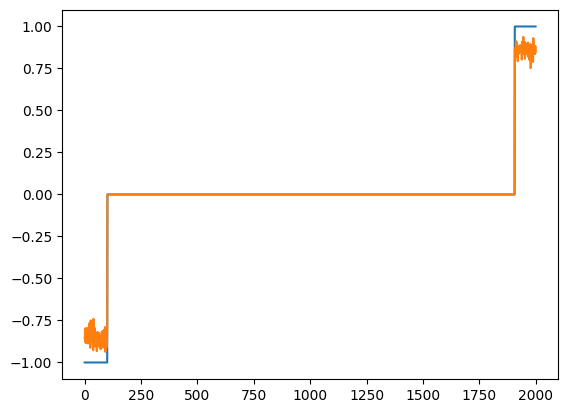

In [ ]:
order = np.argsort(x_true)
plt.plot(x_true[order])
plt.plot(x[order])

SolverSettings(max_precenter=100, max_iter=10, tol=1e-07, safe_boundary_frac=0.99, greedy_boundary_frac=0.9999, gamma=0.5, min_mu=1e-11, tau_reg=1e-12, max_linesearch_steps=50)

In [ ]:
f,A,Q,C,c,b = build_random_logistic(m = 10000,n = 500,k = 100,density=0.1, seed = 2)
settings = SolverSettings(max_iter =5)
problem = GLMProblem(f,A,Q,C,c,b,settings)
x,results = problem.solve()
results

100 constraints
500 variables
10000 rows in A
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│ iter │   primal   │ dual_res  │ cons_viol │ comp_res  │  KKT_res  │    mu    │    Δx     │  step   │ cum_time │
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
│    1 │ 6.9315e+05 │  1.84e+03 │  6.42e+00 │  2.84e+02 │  1.84e+03 │  4.9e+02 │   3.6e-01 │ 3.4e-02 │     0.12s │
│    2 │ 6.9872e+05 │  1.55e+03 │  5.36e+00 │  1.48e+04 │  1.48e+04 │  1.1e+02 │   5.4e-01 │ 1.6e-01 │     0.21s │
│    3 │ 6.8646e+05 │  1.09e+03 │  3.65e+00 │  1.05e+04 │  1.05e+04 │  6.8e+01 │   3.6e-01 │ 3.2e-01 │     0.31s │
│    4 │ 6.5699e+05 │  4.94e+02 │  1.27e+00 │  4.79e+03 │  4.79e+03 │  2.5e+01 │   5.7e-01 │ 6.5e-01 │     0.41s │
│    5 │ 6.4053e+05 │  8.37e+01 │  3.76e-02 │  1.28e+03 │  1.28e+03 │  1.5e+01 │   4.4e-01 │ 9.7e-01 │     0.51s │


SolverResults(settings=SolverSettings(max_precenter=100, max_iter=5, tol=1e-07, safe_boundary_frac=0.99, greedy_boundary_frac=0.9999, gamma=0.5, min_mu=1e-11, tau_reg=1e-12, max_linesearch_steps=50), x=array([ 1.74114031e-01,  1.08445425e-01,  1.14604756e+00,  8.33850817e-01,
        2.07468100e-01, -2.31972219e-01,  4.37793083e-01,  3.56014150e-01,
        1.15982432e-01, -1.20116193e-02,  8.97481754e-01, -4.14659261e-01,
        4.53823375e-01,  9.70783242e-01,  6.59479373e-01,  2.10266286e-01,
        6.39854722e-01,  3.49428822e-01,  6.78406716e-01,  7.91581937e-01,
        2.19569354e-01, -1.06680837e-01,  6.92788457e-01,  7.12515526e-02,
        7.47472843e-01, -1.49004015e-01,  4.74261539e-01,  1.29818930e+00,
        3.47425143e-01,  6.29704915e-01,  8.95468610e-02,  4.13043366e-01,
       -2.64237243e-01,  3.81267085e-01,  3.18424111e-01,  2.94090667e-01,
        2.92823014e-01,  1.41513182e-01, -6.50807529e-01, -2.81322181e-02,
        3.72495614e-01,  4.79579680e-01,  1.5967

In [ ]:
import cvxpy as cp
from scipy.sparse import csc_array
A = csc_array(A)[:,:n]
n = A.shape[1]

beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
neg_log_likelihood = cp.sum(
    cp.multiply(f.w,cp.logistic(A @ beta)- cp.multiply(f.y, A @ beta))
)
regularization = lam*cp.norm1(beta)

problem  = cp.Problem(cp.Minimize(
    (neg_log_likelihood + regularization))
)
problem.solve(verbose = True)

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Apr 18 10:08:32 PM: Your problem has 500 variables, 0 constraints, and 0 parameters.
(CVXPY) Apr 18 10:08:32 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 18 10:08:32 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 18 10:08:32 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 18 10:08:32 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 18 10:08:32 PM: Compiling problem (target solver=CLARABEL).

6895002.804744771

In [ ]:
beta.value - x

array([ 1.34265808e-08,  9.35114965e-09, -1.01217303e-08,  1.09785515e-08,
       -4.10017126e-10, -9.25765933e-07, -1.44884156e-08,  4.21586655e-09,
       -9.63034852e-09,  1.42020135e-08,  1.22822143e-09,  8.31120310e-09,
        8.21623340e-10, -2.55792442e-06, -1.27086995e-09,  7.10121834e-09,
       -3.89341429e-08, -8.12517532e-09, -9.11306057e-09, -5.02486714e-09,
        1.65207328e-08,  3.22499648e-09, -5.80635306e-10, -9.14598574e-09,
       -6.17953893e-09, -1.16025300e-08, -1.26827998e-08,  3.08976516e-10,
        9.43296171e-09, -6.84009702e-09,  4.65827380e-06, -2.13449224e-08,
       -3.77439247e-09,  3.19521836e-08, -6.43548452e-09,  1.01632008e-08,
       -5.81425913e-10,  4.38326499e-09,  3.75066090e-09, -1.00789742e-08,
        1.34041948e-08,  5.20615164e-09, -1.91229984e-08,  9.49687353e-10,
       -6.00942407e-09,  1.07385173e-08,  4.95525185e-09,  6.01460940e-09,
       -7.74996554e-09,  1.15448531e-08,  1.11050151e-09,  1.04141727e-08,
        1.45683462e-08,  